# Cinemática de una Partícula para una Trayectoria Curva General en 3D

$\textbf{Objetivo:}$ obtener la velocidad y la aceleración de una trayectoria genérica de una partícula expresada en forma paramétrica en función del tiempo.


$\textbf{Input:}$
Plantearemos el problema de manera general a través de una función vectorial, con sus componentes $x$, $y$, $z$, parametrizada en función del tiempo:
$$\vec{r}(t)=x(t) \, \hat{i} + y(t) \, \hat{j} + z(t) \, \hat{k} $$


$\textbf{Procedimiento:}$
Calcularemos la velocidad y la aceleración de la partícula, así como sus componentes intrínsecas, a través de las derivadas de la función $\vec{r}(t)$:
$$\textrm{Velocidad:}\quad \vec{v}(t)=\frac{d\vec{r}(t)}{dt}=\dot{\vec{r}}(t)$$
$$\textrm{Aceleración:}\quad \vec{a}(t)=\frac{d\vec{v}(t)}{dt}=\dot{\vec{v}}(t)=\ddot{\vec{r}}(t)$$
$$\textrm{Vector unitario tangencial:}\quad \hat{\tau}(t)=\frac{\vec{v}(t)}{|\vec{v}(t)|}$$

$$\textrm{Aceleración tangencial:}\quad \vec{a}_{\tau}(t)=(\vec{a} \cdot \hat{\tau}) \cdot \hat{\tau}$$

$$\textrm{Aceleración normal:}\quad \vec{a}_{n}(t)=\vec{a}(t)-\vec{a}_{\tau}(t)$$

$$\textrm{Vector unitario normal:}\quad \hat{n}(t)=\frac{\vec{a}_n(t)}{|\vec{a}_n(t)|}$$

Resolveremos el problema de manera totalmente general utilizando <u>cálculo simbólico</u> en Python. De esta manera <u>el código será válido para cualquier tipo de trayectoria</u> (caída libre, movimiento circular o movimiento curvilíneo general) con solo cambiar la función $\vec{r}(t)$. Incluiremos también diferentes representaciones gráficas y simulaciones animadas de los movimientos para ayudar a entender el problema.

$\textbf{Paso 1:}$
Importamos las librerías que necesitaremos para realizar los cálculos, animaciones y representaciones gráficas. Definimos también una función para controlar un botón que controle la ejecución/pausa de los cálculos y la simulación:

In [1]:
from vpython import *
import numpy as np
import sympy as sp
sp.init_printing() # output formateado en latex
import sympy.physics.vector as spv
import IPython.display as disp

run = False
def runbutton(b): # Se llama a esta función cuando se hace click en el botón de ejecutar
    global run
    if run: b.text = 'Ejecutar' # b es el botón
    else: b.text = 'Pausa'
    run = not run

<IPython.core.display.Javascript object>

$\textbf{Paso 2:}$
Definimos la ecuación paramétrica de la trayectoria de manera totalmente genérica en sus 3 componentes espaciales:

In [2]:
tmax=50  # tiempo máximo que durará la simulación

t = sp.symbols('t') # Definimos el símbolo t para representar el tiempo
R= spv.ReferenceFrame('R') # Definimos un sistema de coordenadas para representar los vectores

r_t=-5*sp.cos(t)*R.x+5*sp.sin(t)*R.y+sp.sin(4*t)*sp.sqrt(t)*R.z  # Definimos nuestra trayectoria
#r_t=(sp.cos(t)*sp.sin(2*t)**2)*R.x+sp.cos(4*t)*R.y+sp.sin(4*t**2)*sp.sqrt(t)*R.z  # Definimos nuestra trayectoria

In [3]:
disp.display(disp.Math(r'\vec{r}(t)= '), r_t) # Visualizamos la ecuación de la trayectoria

<IPython.core.display.Math object>

Calculamos la velocidad y la aceleración derivando la ecuación de la trayectoria

<IPython.core.display.Math object>

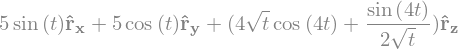

<IPython.core.display.Math object>

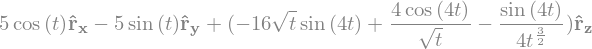

In [4]:
v_t=r_t.diff(t,R) # derivada en cálculo simbólico
a_t=v_t.diff(t,R) # derivada en cálculo simbólico
disp.display(disp.Math(r'\vec{v}(t)= '), v_t) # Visualizamos la velocidad
disp.display(disp.Math(r'\vec{a}(t)= '), a_t) # Visualizamos la aceleración

Calculamos un vector unitario tangente a la trayectoria, a partir de la velocidad:

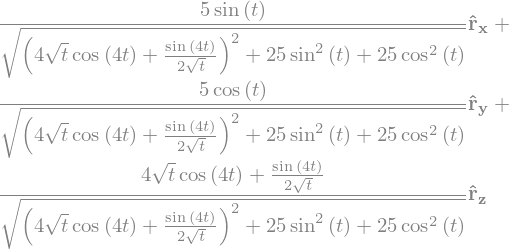

In [5]:
tau_t=v_t/v_t.magnitude()
disp.display(tau_t)

Calculamos la componente tangencial de la aceleración, proyectándola sobre el vector $\hat{\tau}$

<IPython.core.display.Math object>

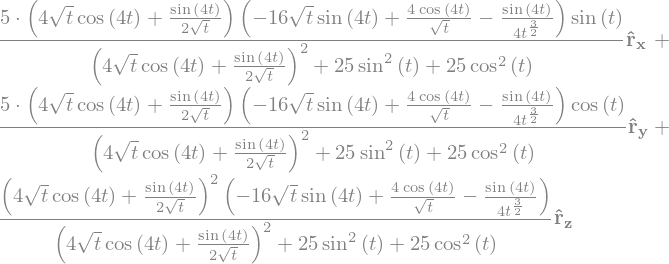

In [6]:
atau_t=spv.dot(a_t,tau_t)*tau_t
disp.display(disp.Math(r'\vec{a}_{\tau}(t)= '),atau_t)

Calculamos la componente normal de la aceleración:

<IPython.core.display.Math object>

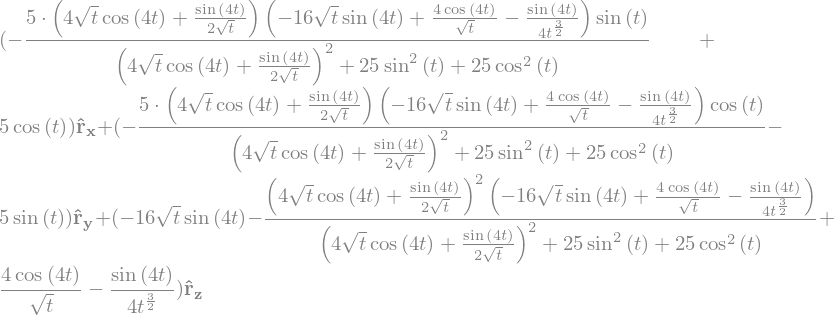

In [7]:
atau_n=a_t-atau_t
disp.display(disp.Math(r'\vec{a}_{n}(t)= '),atau_n)

$\textbf{Paso 3:}$
Para hacer la simulación vamos a definir una esfera que representará la partícula, a al cual asociaremos un vector velocidad y un vector aceleración para representarlos en la simulación de manera dinámica. Incluimos también el botón de ejecución llamando a la función que definimos al principio del programa.

Definimos también gráficas en las que representaremos las componentes $x$, $y$, $z$ de las posiciones y velocidades de la partícula, así como la proyección de la trayectoria y su hodógrafa en el plano XY.

In [8]:
escena1 = canvas(background=color.white, autoscale=False, width=1000,height=300) # Escenario donde se realiza la simulación

tempo=0 # inicializamos el tiempo
# a continuación definimos las componentes x e y de cada magnitud en el instante inicial
posx=spv.dot(r_t, R.x).evalf(subs={t: tempo})
posy=spv.dot(r_t, R.y).evalf(subs={t: tempo})
posz=spv.dot(r_t, R.z).evalf(subs={t: tempo})
velx=spv.dot(v_t, R.x).evalf(subs={t: tempo})
vely=spv.dot(v_t, R.y).evalf(subs={t: tempo})
velz=spv.dot(v_t, R.z).evalf(subs={t: tempo})
acx=spv.dot(a_t, R.x).evalf(subs={t: tempo})
acy=spv.dot(a_t, R.y).evalf(subs={t: tempo})
acz=spv.dot(a_t, R.z).evalf(subs={t: tempo})

# vectores iniciales
r0=vector(posx, posy, posz)
v0=vector(velx,vely,velz)
a0=vector(acx,acy,acz)

# definimos la bola y los vectores v y a
bola = sphere(pos=r0, radius=0.4, color=color.red, make_trail=True, emissive=True)
bola.v=v0
bola.a=a0
attach_arrow(bola, 'v', scale=0.25, color=color.blue)
attach_arrow(bola, 'a', scale=0.25, color=color.yellow)
attach_light(bola)

button(text='Run', bind=runbutton)

# definimos las gráficas
posiciones=graph(title='Posición de la partícula', width=600, height=200, 
                 xmin=0, xmax=tmax, #ymin=-amplitud, ymax=amplitud,
                  align='left', xtitle='<i>t</i>', ytitle='<i>Posición</i>')
trayectoria=graph(title='Trayectoria de la partícula', width=300, height=200,
                  #xmin=-amplitud, xmax=amplitud, ymin=-amplitud, ymax=amplitud,
                   align='right', xtitle='<i>x</i>', ytitle='<i>y</i>')
velocidades=graph(title='Velocidad de la partícula', width=600, height=200,
                  xmin=0, xmax=tmax, #ymin=-amplitud*frecuencia, ymax=amplitud*frecuencia,
                   align='left', xtitle='<i>t</i>', ytitle='<i>Velocidad</i>')
hodografa=graph(title='Hodógrafa de la partícula', width=300, height=200,
                #xmin=-amplitud*frecuencia, xmax=amplitud*frecuencia, ymin=-amplitud*frecuencia, ymax=amplitud*frecuencia,
                align='right', xtitle='<i>v<sub>x</sub></i>', ytitle='<i>v<sub>y</sub></i>')

x = gcurve(color=color.black, legend=True, label="x", graph=posiciones)
y = gcurve(color=color.red, legend=True, label="y", graph=posiciones)
z = gcurve(color=color.blue, legend=True, label="z", graph=posiciones)
vx = gcurve(color=color.black, legend=True, label="<i>v<sub>x</sub></i>", graph=velocidades)
vy = gcurve(color=color.red, legend=True, label="<i>v<sub>y</sub></i>", graph=velocidades)
vz = gcurve(color=color.blue, legend=True, label="<i>v<sub>z</sub></i>", graph=velocidades)

trj=gcurve(color=color.black, graph=trayectoria)
hod=gcurve(color=color.black, graph=hodografa)

# calculamos todas las magnitudes en función del tiempo
while (tempo <tmax):
    rate(10)
    if run:
        tempo=tempo+0.05
        posx=spv.dot(r_t, R.x).evalf(subs={t: tempo})
        posy=spv.dot(r_t, R.y).evalf(subs={t: tempo})
        posz=spv.dot(r_t, R.z).evalf(subs={t: tempo})
        velx=spv.dot(v_t, R.x).evalf(subs={t: tempo})
        vely=spv.dot(v_t, R.y).evalf(subs={t: tempo})
        velz=spv.dot(v_t, R.z).evalf(subs={t: tempo})
        acx=spv.dot(a_t, R.x).evalf(subs={t: tempo})
        acy=spv.dot(a_t, R.y).evalf(subs={t: tempo})
        acz=spv.dot(a_t, R.z).evalf(subs={t: tempo})
        bola.a=vector(acx,acy,acz)
        bola.v=vector(velx,vely,velz)
        bola.pos=vector(posx,posy,posz)
        x.plot(tempo, posx)
        y.plot(tempo, posy)
        z.plot(tempo, posz)
        trj.plot(posx,posy)
        vx.plot(tempo, velx)
        vy.plot(tempo, vely)
        vz.plot(tempo, velz)
        hod.plot(velx,vely)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>